In [36]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', 400)

In [37]:
# Read the data into a Pandas DataFrame
chronic_disease_df = pd.read_csv('Resources/U.S._Chronic_Disease_Indicators 2.csv')
chronic_disease_df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD 12.00,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN


In [38]:
chronic_disease_df.info

<bound method DataFrame.info of         YearStart  YearEnd LocationAbbr    LocationDesc DataSource  \
0            2019     2019           AR        Arkansas      BRFSS   
1            2019     2019           ID           Idaho      BRFSS   
2            2019     2019           IN         Indiana      YRBSS   
3            2019     2019           IA            Iowa       NVSS   
4            2019     2019           IA            Iowa      BRFSS   
...           ...      ...          ...             ...        ...   
309210       2022     2022           VI  Virgin Islands      BRFSS   
309211       2022     2022           WV   West Virginia      BRFSS   
309212       2022     2022           WI       Wisconsin      BRFSS   
309213       2022     2022           VT         Vermont      BRFSS   
309214       2022     2022           WA      Washington      BRFSS   

                                        Topic  \
0                                    Diabetes   
1                            

In [39]:
chronic_disease_df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'LocationID', 'TopicID', 'QuestionID', 'ResponseID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [40]:
chronic_disease_df.rename(columns={
    'YearStart': 'year_started',
    'YearEnd': 'year_ended',
    'LocationAbbr': 'state_abbr',
    'LocationDesc': 'state'}, inplace=True)

chronic_disease_df

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,NaN,%,Crude Prevalence,...,SLEP,SLP02,NaN,CRDPREV,GRADE,GRD 12.00,NaN,NaN,NaN,NaN
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",NaN,Number,Number,...,AST,AST01,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309210,2022,2022,VI,Virgin Islands,BRFSS,Tobacco,Quit attempts in the past year among adult current smokers,NaN,%,Age-adjusted Prevalence,...,TOB,TOB06,NaN,AGEADJPREV,RACE,AIAN,NaN,NaN,NaN,NaN
309211,2022,2022,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Chronic obstructive pulmonary disease among adults,NaN,%,Crude Prevalence,...,COPD,COPD01,NaN,CRDPREV,OVERALL,OVR,NaN,NaN,NaN,NaN
309212,2022,2022,WI,Wisconsin,BRFSS,Immunization,Pneumococcal vaccination among adults aged 65 years and older,NaN,%,Crude Prevalence,...,IMM,IMM04,NaN,CRDPREV,RACE,BLK,NaN,NaN,NaN,NaN
309213,2022,2022,VT,Vermont,BRFSS,Social Determinants of Health,Lack of health insurance among adults aged 18-64 years,NaN,%,Crude Prevalence,...,SDOH,SDH09,NaN,CRDPREV,RACE,HAPI,NaN,NaN,NaN,NaN


In [41]:
cleaned_diseases_df = pd.DataFrame({
    
})

In [42]:
datasource_groupby = chronic_disease_df.groupby('DataSource')['Topic'].max()
datasource_groupby.head()

DataSource
ACS                               Social Determinants of Health
AEDS                                                    Alcohol
ANRF                                                    Tobacco
BRFSS                                                   Tobacco
CMS Part A Claims Data    Chronic Obstructive Pulmonary Disease
Name: Topic, dtype: object

In [43]:
datasource_groupby = chronic_disease_df[chronic_disease_df['DataSource'] == 'BRFSS']
datasource_groupby.head()

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,NaN,%,Crude Prevalence,...,AST,AST02,NaN,CRDPREV,AGE,AGE1844,NaN,NaN,NaN,NaN
6,2019,2019,IA,Iowa,BRFSS,Health Status,Recent activity limitation among adults,NaN,Number,Crude Mean,...,HEA,HEA04,NaN,CRDMEAN,SEX,SEXF,NaN,NaN,NaN,NaN
7,2019,2019,IA,Iowa,BRFSS,Mental Health,Depression among adults,NaN,%,Crude Prevalence,...,MEN,MEN02,NaN,CRDPREV,RACE,MRC,NaN,NaN,NaN,NaN


In [44]:
chronic_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309215 entries, 0 to 309214
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year_started               309215 non-null  int64  
 1   year_ended                 309215 non-null  int64  
 2   state_abbr                 309215 non-null  object 
 3   state                      309215 non-null  object 
 4   DataSource                 309215 non-null  object 
 5   Topic                      309215 non-null  object 
 6   Question                   309215 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              309215 non-null  object 
 9   DataValueType              309215 non-null  object 
 10  DataValue                  209196 non-null  float64
 11  DataValueAlt               209196 non-null  float64
 12  DataValueFootnoteSymbol    101716 non-null  object 
 13  DataValueFootnote          10

In [45]:
chronic_disease_df_drop = chronic_disease_df.drop(columns=['Response','StratificationCategory2', 'Stratification2', 'StratificationCategory3', 'Stratification3',
                                 'ResponseID', 'StratificationCategoryID2', 'StratificationID2', 'StratificationCategoryID3', 'StratificationID3',
                                 'DataValueFootnoteSymbol', 'DataValueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit', 'TopicID', 'QuestionID', 
                                 'DataValueTypeID'])
chronic_disease_df_drop.head()

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,Geolocation,LocationID,StratificationCategoryID1,StratificationID1
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,13.6,13.6,Sex,Male,POINT (-92.27449074299966 34.74865012400045),5,SEX,SEXM
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,10.6,10.6,Sex,Male,POINT (-114.3637300419997 43.682630005000476),16,SEX,SEXM
2,2019,2019,IN,Indiana,YRBSS,Sleep,Short sleep duration among high school students,%,Crude Prevalence,NaN,NaN,Grade,Grade 12,POINT (-86.14996019399968 39.766910452000445),18,GRADE,GRD 12.00
3,2019,2019,IA,Iowa,NVSS,Asthma,"Asthma mortality among all people, underlying cause",Number,Number,54.0,54.0,Overall,Overall,POINT (-93.81649055599968 42.46940091300047),19,OVERALL,OVR
4,2019,2019,IA,Iowa,BRFSS,Asthma,Current asthma among adults,%,Crude Prevalence,10.3,10.3,Age,Age 18-44,POINT (-93.81649055599968 42.46940091300047),19,AGE,AGE1844


In [46]:
chronic_disease_df_drop["Topic"].unique


<bound method Series.unique of 0                                      Diabetes
1                                      Diabetes
2                                         Sleep
3                                        Asthma
4                                        Asthma
                          ...                  
309210                                  Tobacco
309211    Chronic Obstructive Pulmonary Disease
309212                             Immunization
309213            Social Determinants of Health
309214                                  Alcohol
Name: Topic, Length: 309215, dtype: object>

In [47]:
grouped_counts = chronic_disease_df_drop.groupby(['DataSource', 'Topic'])['Topic'].count()
grouped_counts

DataSource                                   Topic                                          
ACS                                          Social Determinants of Health                       3224
AEDS                                         Alcohol                                              165
ANRF                                         Tobacco                                              165
BRFSS                                        Alcohol                                            16460
                                             Arthritis                                          18645
                                             Asthma                                              4895
                                             Cancer                                              4838
                                             Cardiovascular Disease                             10117
                                             Chronic Obstructive Pulmonary Disease         

In [48]:
#reset index
grouped_counts_df = grouped_counts.reset_index(name='Count')
grouped_counts_df

,DataSource,Topic,Count
0,ACS,Social Determinants of Health,3224
1,AEDS,Alcohol,165
2,ANRF,Tobacco,165
3,BRFSS,Alcohol,16460
4,BRFSS,Arthritis,18645
5,BRFSS,Asthma,4895
6,BRFSS,Cancer,4838
7,BRFSS,Cardiovascular Disease,10117
8,BRFSS,Chronic Obstructive Pulmonary Disease,8855
9,BRFSS,Cognitive Health and Caregiving,9904


In [49]:
#sort decending by 'count'
sorted_grouped_counts = grouped_counts_df.sort_values(by='Count', ascending=False)
sorted_grouped_counts.head(10)

,DataSource,Topic,Count
12,BRFSS,Health Status,25300
13,BRFSS,Immunization,19140
4,BRFSS,Arthritis,18645
39,US Cancer DVT,Cancer,17520
29,NVSS,Cardiovascular Disease,16848
3,BRFSS,Alcohol,16460
15,BRFSS,"Nutrition, Physical Activity, and Weight Status",16445
14,BRFSS,Mental Health,15180
18,BRFSS,Social Determinants of Health,13695
31,NVSS,Diabetes,11232


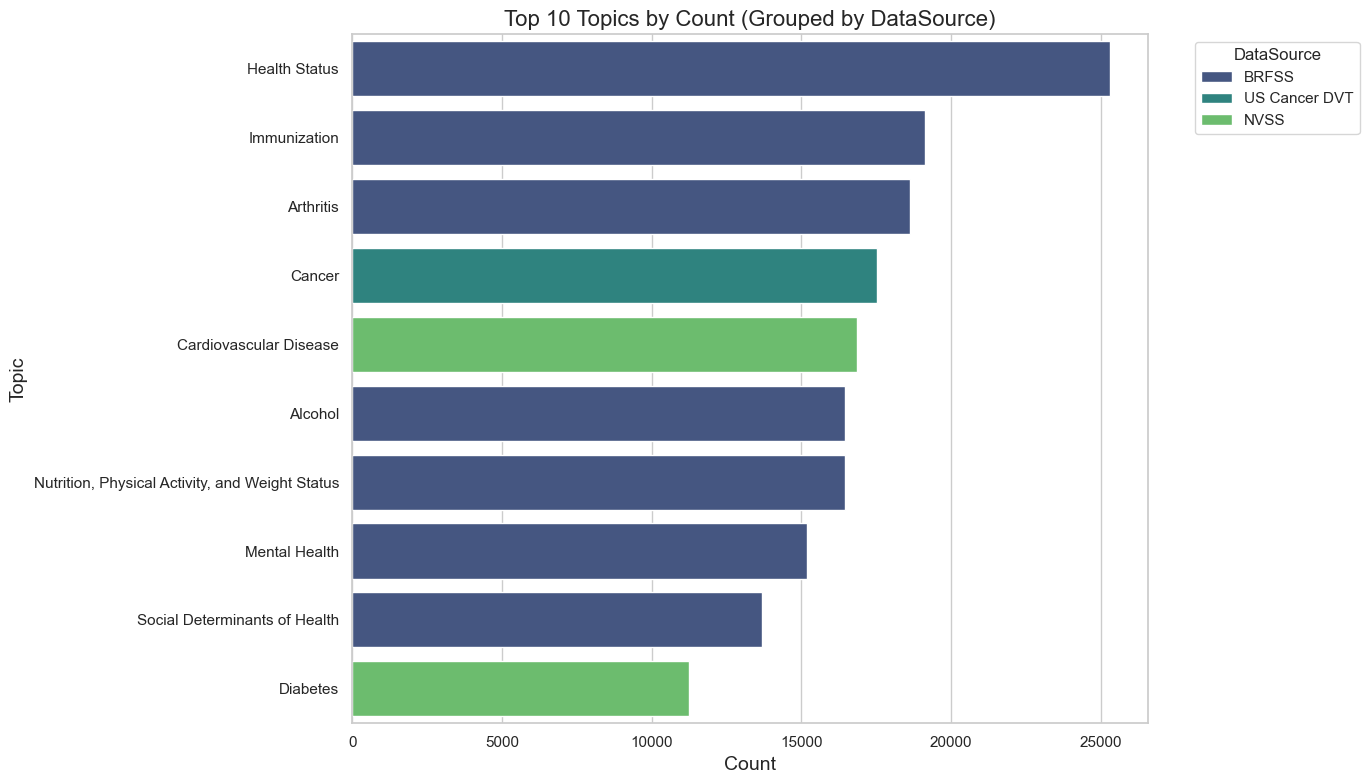

In [50]:
top_10 = sorted_grouped_counts.head(10)

# Set plot size and style
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# Create bar plot
bar_plot = sns.barplot(
    data=top_10, 
    x='Count', 
    y='Topic', 
    hue='DataSource', 
    dodge=False, 
    palette='viridis'
)

# Add titles and labels
plt.title('Top 10 Topics by Count (Grouped by DataSource)', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Topic', fontsize=14)
plt.legend(title='DataSource', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [51]:
chronic_disease_df_drop["StratificationCategory1"].unique

<bound method Series.unique of 0                    Sex
1                    Sex
2                  Grade
3                Overall
4                    Age
               ...      
309210    Race/Ethnicity
309211           Overall
309212    Race/Ethnicity
309213    Race/Ethnicity
309214               Sex
Name: StratificationCategory1, Length: 309215, dtype: object>

In [52]:
sex_df = chronic_disease_df_drop[chronic_disease_df_drop['StratificationCategory1'] == 'Sex'].copy()
age_df = chronic_disease_df_drop[chronic_disease_df_drop['StratificationCategory1'] == 'Age'].copy()
grade_df = chronic_disease_df_drop[chronic_disease_df_drop['StratificationCategory1'] == 'Grade'].copy()
overall_df = chronic_disease_df_drop[chronic_disease_df_drop['StratificationCategory1'] == 'Overall'].copy()
race_ethnicity_df = chronic_disease_df_drop[chronic_disease_df_drop['StratificationCategory1'] == 'Race/Ethnicity'].copy() 
sex_df.head()
                                

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Stratification1,Geolocation,LocationID,StratificationCategoryID1,StratificationID1
0,2019,2019,AR,Arkansas,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,13.6,13.6,Sex,Male,POINT (-92.27449074299966 34.74865012400045),5,SEX,SEXM
1,2019,2019,ID,Idaho,BRFSS,Diabetes,Diabetes among adults,%,Crude Prevalence,10.6,10.6,Sex,Male,POINT (-114.3637300419997 43.682630005000476),16,SEX,SEXM
6,2019,2019,IA,Iowa,BRFSS,Health Status,Recent activity limitation among adults,Number,Crude Mean,2.3,2.3,Sex,Female,POINT (-93.81649055599968 42.46940091300047),19,SEX,SEXF
10,2019,2019,MD,Maryland,YRBSS,Alcohol,Alcohol use among high school students,%,Crude Prevalence,21.0,21.0,Sex,Male,POINT (-76.60926011099963 39.29058096400047),24,SEX,SEXM
12,2019,2019,MD,Maryland,BRFSS,Mental Health,Depression among adults,%,Crude Prevalence,19.2,19.2,Sex,Female,POINT (-76.60926011099963 39.29058096400047),24,SEX,SEXF


In [53]:
grouped_chronic_disease_df = sex_df.groupby(['Stratification1']).count()
grouped_chronic_disease_df.head()

,year_started,year_ended,state_abbr,state,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,DataValueAlt,StratificationCategory1,Geolocation,LocationID,StratificationCategoryID1,StratificationID1
Stratification1,,,,,,,,,,,,,,,,
Female,26909,26909,26909,26909,26909,26909,26909,26909,26909,24994,24994,26909,26412,26909,26909,26909
Male,26909,26909,26909,26909,26909,26909,26909,26909,26909,24663,24663,26909,26412,26909,26909,26909


In [54]:
sex_df.groupby(['Stratification1'])['Topic'].count()

Stratification1
Female    26909
Male      26909
Name: Topic, dtype: int64

In [55]:
grouped_male_df = grouped_counts.reset_index(name='Male')

# Sort the 'grouped_male_female_df' DataFrame based on the 'Male' column in ascending order
grouped_male_df_sorted = grouped_male_df.sort_values(by='Male', ascending=False)
grouped_male_df_sorted.head()

,DataSource,Topic,Male
12,BRFSS,Health Status,25300
13,BRFSS,Immunization,19140
4,BRFSS,Arthritis,18645
39,US Cancer DVT,Cancer,17520
29,NVSS,Cardiovascular Disease,16848


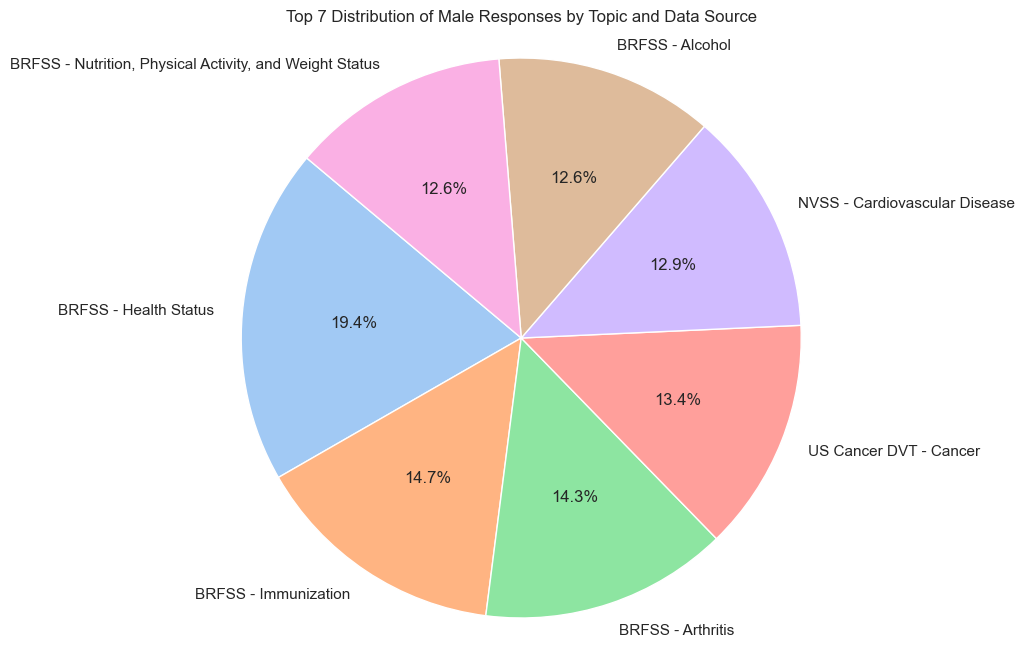

In [35]:
pie_chart= pd.DataFrame(grouped_male_df_sorted)

# Sort by 'Male' column in descending order and select the top 10
df_top10 = grouped_male_df_sorted.sort_values(by='Male', ascending=False).head(7)

# Combine DataSource and Topic for better labeling
labels = [f"{ds} - {topic}" for ds, topic in zip(df_top10['DataSource'], df_top10['Topic'])]
sizes = df_top10['Male']

# Plot Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 7 Distribution of Male Responses by Topic and Data Source')
plt.axis('equal')  # Ensures the pie is a perfect circle
plt.show()

In [56]:
grouped_female_df = grouped_counts.reset_index(name='Female')
grouped_female_df_sorted = grouped_female_df.sort_values(by='Female', ascending=False)
grouped_female_df_sorted.head()

,DataSource,Topic,Female
12,BRFSS,Health Status,25300
13,BRFSS,Immunization,19140
4,BRFSS,Arthritis,18645
39,US Cancer DVT,Cancer,17520
29,NVSS,Cardiovascular Disease,16848


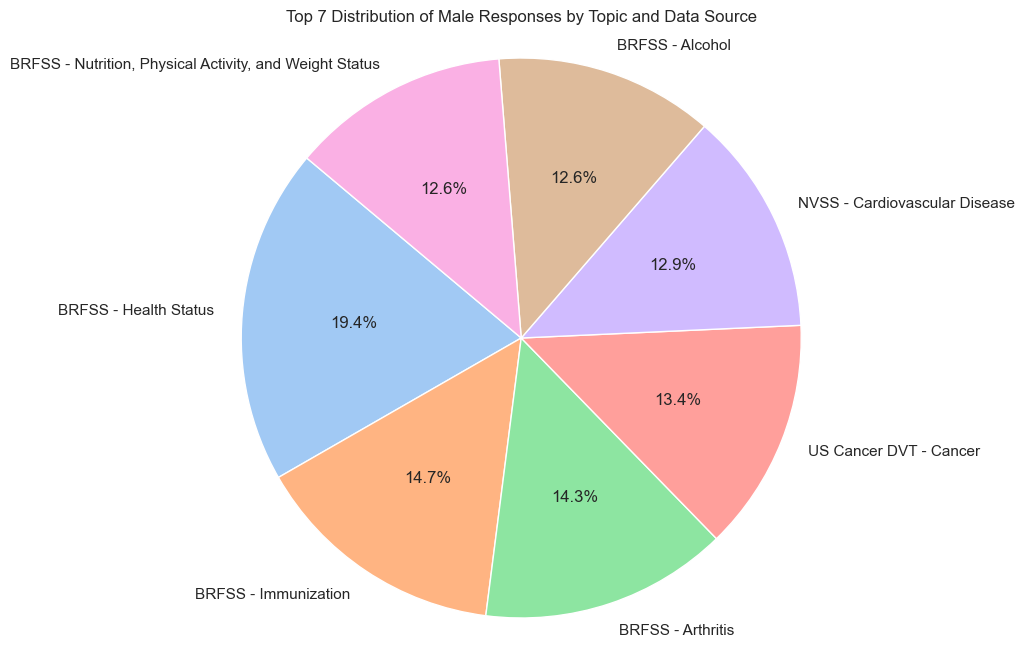

In [60]:
pie_chart= pd.DataFrame(grouped_female_df_sorted)

# Sort by 'Male' column in descending order and select the top 10
df_top10 = grouped_female_df_sorted.sort_values(by='Female', ascending=False).head(7)

# Combine DataSource and Topic for better labeling
labels = [f"{ds} - {topic}" for ds, topic in zip(df_top10['DataSource'], df_top10['Topic'])]
sizes = df_top10['Female']

# Plot Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 7 Distribution of Male Responses by Topic and Data Source')
plt.axis('equal')  # Ensures the pie is a perfect circle
plt.show()